In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib
import time
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# 파일 불러오기
데이터 출처 - https://cseweb.ucsd.edu/~jmcauley/datasets.html#multi_aspect

1. 행간이 "\n" 으로 구분된 ".json" file 업로드 (```pd.read_json```)
2. 결측치 1개 제거 (마지막행이 업로드시 이슈가 발생하는 것 같다) (```pd.DataFrame.dropna()```)

In [2]:
ratebeer = pd.read_json("../data/raw_ratebeer.json")

3. 중복 데이터 제거 (완전히 중복되는 행 drop - 4개의 데이터)

In [3]:
# print(f"Raw data's length = {ratebeer.shape[0]:7,}")
# print(f"Drop-duplicated data's length = {ratebeer.drop_duplicates().shape[0]:7,}")
# ratebeer.drop_duplicates(inplace=True)


# 데이터 탐색

## 변수 설명
참고자료 - https://www.ratebeer.com/Story.asp?StoryID=292

- `beer_name`: 맥주 이름(상표)
- `beer_id`: 맥주 일련번호(코드)
- `brewer_id`: 맥주 생산자 일련번호
- `abv`: 맥주 알코올 도수(Alcohol by volume, %)
- `style`: 맥주 카테고리
- `appearance`: 평가점수-외관(look) 
- `aroma`: 평가점수-향기(smell)
- `palate`: 평가점수-the sense of taste(feel)
- `taste`: 평가점수-맛
- `overall`: 평가점수-종합
- `reviewtime`: 평가 시간
- `profile_name`: 유저ID
- `reviewtext`: 리뷰 코멘트
  
  



In [4]:
ratebeer.head(3)

,reviewscore,reviewtime,reviewtext,appearance,aroma,palate,taste,overall,profile_name,beer_name,beer_id,brewer_id,abv,style,image_url
0,3.9,2022-05-15T17:26:51.803Z,Tap at Fermentoren CPH. Poured a hazy golden c...,3.0,8.0,4.0,8.0,16.0,jmgreenuk,Hill Farmstead Arthur,131594.0,11233.0,6.0,Saison / Farmhouse / Grisette,https://res.cloudinary.com/ratebeer/image/uplo...
1,3.9,2022-05-04T19:05:02.673Z,Bottle I shared with JB. Beautiful cloudy str...,4.0,8.0,4.0,8.0,15.0,Ron,Hill Farmstead Arthur,131594.0,11233.0,6.0,Saison / Farmhouse / Grisette,https://res.cloudinary.com/ratebeer/image/uplo...
2,4.1,2021-10-24T12:35:44.710Z,"2019 vintage\nAroma is vinegar, sour apples, f...",4.0,8.0,4.0,9.0,16.0,olberic,Hill Farmstead Arthur,131594.0,11233.0,6.0,Saison / Farmhouse / Grisette,https://res.cloudinary.com/ratebeer/image/uplo...


In [5]:
n_data, n_var = ratebeer.shape
print('[ratebeer] 데이터 길이 : ',format(n_data, ','))
print('[ratebeer] 변수 개수  : ', format(n_var, ','))

[ratebeer] 데이터 길이 :  3,244,442
[ratebeer] 변수 개수  :  15


In [6]:
# 표면상 데이터 결측치 확인
ratebeer.isna().sum()

reviewscore        28
reviewtime          0
reviewtext          0
appearance      15347
aroma           15347
palate          15347
taste           15347
overall         15347
profile_name        0
beer_name         779
beer_id           779
brewer_id         779
abv               779
style             779
image_url         779
dtype: int64

### beer/name - 맥주 이름 (상표) 탐색

In [7]:
# beer/name 맥주 이름 (상표) 탐색
n_item = ratebeer['beer_name'].nunique()
print(f"[ratebeer] 맥주의 종류: {n_item:,}가지")
# print(f"[ratebeer] 맥주의 스타일 종류: {ratebeer['beer/style'].nunique():,}")

# beer/beerId 와의 관계
n_itemId = ratebeer['beer_id'].nunique() # 개념상 개수가 같아야하는데, `beer/beerId`가 조금 더 많다. Why?
print(f"[ratebeer] 맥주의 일련번호: {n_itemId:,}가지")


[ratebeer] 맥주의 종류: 9,336가지
[ratebeer] 맥주의 일련번호: 9,336가지


In [8]:
# 맥주의 개수와 맥주의 일련 번호가 1대1 대응 입니다!

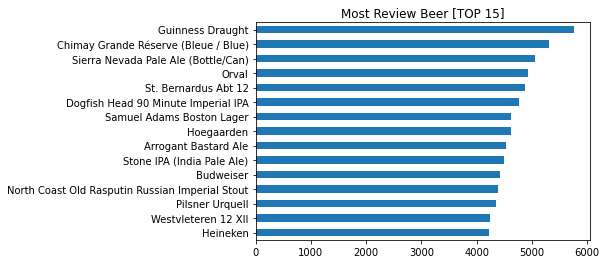

In [9]:
# 어떤 맥주가 리뷰 횟수가 많을까? 상위 15개의 맥주만 한 번 뽑아보자.
ratebeer['beer_name'].value_counts()[:15][::-1].plot(kind = 'barh')
plt.title("Most Review Beer [TOP 15]")
plt.show()

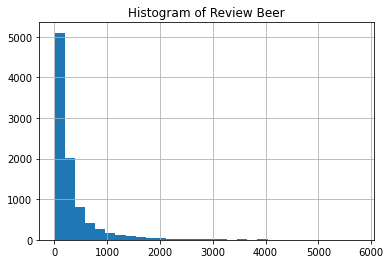

In [10]:
# 맥주 리뷰 횟수의 분포를 확인해보자
ratebeer['beer_name'].value_counts().hist(bins=30)
plt.title("Histogram of Review Beer")
plt.show()

In [11]:
# 거의 대부분의 맥주가 리뷰 횟수가 적다. -> 대부분의 맥주는 잘 조회되지 않는다. 

In [12]:
# 그렇다면, 리뷰 개수가 적은 맥주는 몇 개나 있을까? 

print(f"* 해당 데이터 안에서 존재하는 맥주의 총 가지 수  = {n_item:,}", end="\n\n")
for index, value in ratebeer['beer_name'].value_counts().value_counts().items():
    # print(index, value)
    print(f"리뷰 개수가 {index:3,} 개인 맥주의 가지 수 = {value:6,} 가지")
    # if index >= 10: break

* 해당 데이터 안에서 존재하는 맥주의 총 가지 수  = 9,336

리뷰 개수가  81 개인 맥주의 가지 수 =     64 가지
리뷰 개수가  59 개인 맥주의 가지 수 =     58 가지
리뷰 개수가  65 개인 맥주의 가지 수 =     57 가지
리뷰 개수가 115 개인 맥주의 가지 수 =     56 가지
리뷰 개수가  60 개인 맥주의 가지 수 =     55 가지
리뷰 개수가  66 개인 맥주의 가지 수 =     55 가지
리뷰 개수가  78 개인 맥주의 가지 수 =     54 가지
리뷰 개수가  68 개인 맥주의 가지 수 =     54 가지
리뷰 개수가  76 개인 맥주의 가지 수 =     54 가지
리뷰 개수가  90 개인 맥주의 가지 수 =     54 가지
리뷰 개수가  98 개인 맥주의 가지 수 =     53 가지
리뷰 개수가  92 개인 맥주의 가지 수 =     52 가지
리뷰 개수가  72 개인 맥주의 가지 수 =     52 가지
리뷰 개수가 125 개인 맥주의 가지 수 =     51 가지
리뷰 개수가  89 개인 맥주의 가지 수 =     51 가지
리뷰 개수가  67 개인 맥주의 가지 수 =     51 가지
리뷰 개수가  74 개인 맥주의 가지 수 =     50 가지
리뷰 개수가  57 개인 맥주의 가지 수 =     50 가지
리뷰 개수가  69 개인 맥주의 가지 수 =     50 가지
리뷰 개수가  86 개인 맥주의 가지 수 =     49 가지
리뷰 개수가  58 개인 맥주의 가지 수 =     49 가지
리뷰 개수가  96 개인 맥주의 가지 수 =     49 가지
리뷰 개수가 120 개인 맥주의 가지 수 =     49 가지
리뷰 개수가 109 개인 맥주의 가지 수 =     48 가지
리뷰 개수가  61 개인 맥주의 가지 수 =     48 가지
리뷰 개수가 102 개인 맥주의 가지 수 =     48 가지
리뷰 개수가 107 개인 맥주의 가지 수 =     48 가지
리뷰 개수가  79 개인 맥주

In [13]:
# 확실히 대부분의 맥주가 리뷰 수가 크게 많지 않다는 것을 알 수 있다.
# (이것을 인기도의 관점으로 해석을 할 수 있는 여지가 있다.)

In [14]:
##### 종합 평가 ##### 
# 리뷰 개수가 적은 데이터는 추천에 사용하기 힘들 수 있다.
# 하지만 목적에 따라 어떤 데이터로 사용할 수 있기 때문에 전처리 하는 것은 유보한다.
# 생각해볼만한점.
# 어떤 맥주를 추천해주기 위해서는 맥주가 적어도 몇 개가 있어야 좋을까?

# (생각해볼점) 현재 유통되는 맥주인지 어떻게 아나?

### beer/brewerId - 맥주 생산자 일련번호

In [15]:
# 기존에는 float 형으로 기록되어있는데, 변수명을 유추했을때, int라고 판단된다. 따라서 실제로 int 형으로 취급해도 되는지 확인 해본다. 
# print(sum(ratebeer['brewer_id'] != ratebeer['brewer_id'].astype(int)))

# int 형으로 변경
# ratebeer['brewer_id'] = ratebeer['brewer_id'].astype(int)

In [16]:
# 몇개의 생산자가 있을까?
n_brewer = ratebeer['brewer_id'].nunique()
print(f"[ratebeer] 맥주의 생산자: {n_brewer:,}가지")

[ratebeer] 맥주의 생산자: 1,525가지


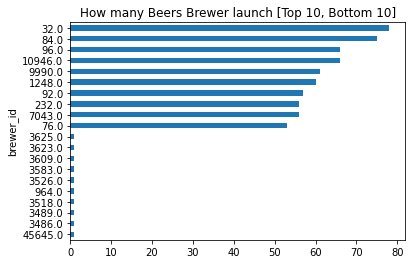

In [17]:
# 생산자의 맥주 생산 개수 분포 확인;  맥주 생산을 많이 하는 생산자와 별로 생산하지 않는 생산자와 같은 정보를 확인한다.
ratebeer.groupby(["brewer_id"])["beer_name"].nunique().sort_values(ascending=False).iloc[np.r_[0:10, -10:0]][::-1].plot(kind = 'barh')
plt.title("How many Beers Brewer launch [Top 10, Bottom 10]")
plt.show()

In [18]:
# 많게는 300개의 맥주를 발매한 회사부터, 1개의 맥주만 발매한 회사도 다수 존재한다.

In [19]:
# 그렇다면 혹시, 맥주를 많이 생산하는 생산자는 전체 리뷰수도 많을까?

top40brewers = ratebeer.groupby(["brewer_id"])["beer_name"].nunique().sort_values(ascending=False).head(40).index
brewer_reviews = ratebeer.value_counts("brewer_id").reset_index()
brewer_reviews.columns = ["brewer_id", "freq"]

brewer_reviews["top40brewer"] = brewer_reviews["brewer_id"].isin(top40brewers)
brewer_reviews.sort_values("freq", ascending=False, inplace=True)

brewer_reviews["top40brewer"] = np.where(brewer_reviews["top40brewer"], brewer_reviews["freq"], 0)
brewer_reviews["normal"] = np.where(brewer_reviews["top40brewer"]==False, brewer_reviews["freq"], 0)
brewer_reviews.head()

,brewer_id,freq,top40brewer,normal
0,32.0,57533,57533,0
1,198.0,51611,51611,0
2,96.0,47833,47833,0
3,232.0,46143,46143,0
4,67.0,44993,44993,0


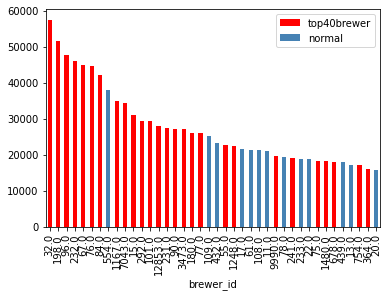

In [20]:
brewer_reviews.drop("freq", axis= 1).set_index("brewer_id").head(40).plot(kind = 'bar',  stacked=True, color=['red', 'steelblue', ])
plt.show()

In [21]:
# 맥주를 많이 발행한 회사가 총 리뷰수도 많다.

### beer/ABV - 맥주 알코올도수 탐색

In [22]:
# 알코올도수는 숫자 타입이여야하는데, 임포트될때, 자동으로 object 타입으로 변경되었던것으로 보아, str 타입의 정보가 포함되어있을수있다.
# 숫자가 아닌 값의 개수는?
abvs = pd.to_numeric(ratebeer["abv"], errors="coerce") # 숫자가 아닌 타입을 수치형으로 바꾸는데, 실제로 수치형으로 변환 불가한 타입의 정보는 NaN 처리를 해주는 명령어
print(f"[ratebeer] ABV(알코올 도수)에서 결측치('-') 리뷰 개수: {abvs.isna().sum(): 7,}개")
ratebeer["abv"] = abvs

[ratebeer] ABV(알코올 도수)에서 결측치('-') 리뷰 개수:     779개


In [23]:
# 그렇다면, 몇 개의 맥주가 알코올 도수가 없을까?
n_missing_ABV = ratebeer[ratebeer["abv"].isna()]["beer_name"].nunique()
print(f"[ratebeer] ABV(알코올 도수)에서 결측치('-') 맥주 개수: {n_missing_ABV: 7,}개")


[ratebeer] ABV(알코올 도수)에서 결측치('-') 맥주 개수:       0개


In [24]:
# 전체 맥주의 개수가 110,299개 이므로, 전체 리뷰에서 결측치의 영향력 보다는 맥주 이름을 기준으로는 훨씬더 결측치의 비율측면에서 더 높은 것으로 보인다. 

In [25]:
# 기본 통계치부터 살펴보자
round(ratebeer["abv"].describe(), 3)

count    3243663.000
mean           6.863
std            2.389
min            0.000
25%            5.100
50%            6.200
75%            8.200
max           29.000
Name: abv, dtype: float64

In [26]:
# 맥주가, 알코올이 무려 57.700 까지 높은 것도 존재하고, 논알코올로 보이는것도 존재한다.

### beer/style - 맥주 스타일 종류 탐색

In [27]:
# beer/style 맥주 스타일 종류 탐색
n_style = ratebeer['style'].nunique()
print(f"[ratebeer] 맥주의 스타일 종류: {n_style:,}가지")


[ratebeer] 맥주의 스타일 종류: 131가지


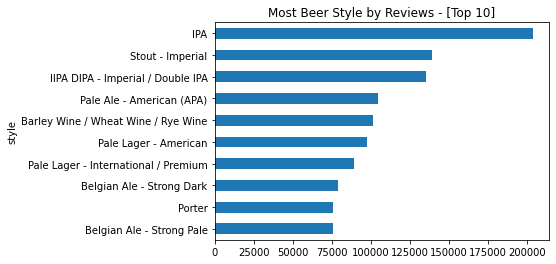

In [28]:
# 맥주 스타일에는 뭐가 있을까? 리뷰 횟수 기준, 가장 많은 맥주의 스타일과, 맥주 종류 기준으로 가장 많은 맥주의 스타일을 구해본다. 
# 리뷰 기준, 맥주 스타일 top N
ratebeer.value_counts("style").head(10)[::-1].plot(kind = "barh")
plt.title("Most Beer Style by Reviews - [Top 10]")
plt.show()

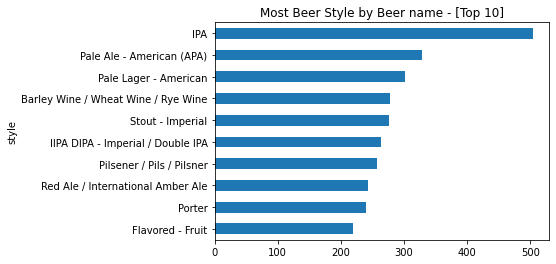

In [29]:
# 맥주 종류 기준, 맥주 스타일 top N
ratebeer.groupby("style")["beer_name"].nunique().sort_values(ascending=False).head(10)[::-1].plot(kind="barh")
plt.title("Most Beer Style by Beer name - [Top 10]")
plt.show()

In [30]:
set_top10_style_by_review = set(ratebeer.value_counts("style").head(10).index)
set_top10_style_by_name = set(ratebeer.groupby("style")["beer_name"].nunique().sort_values(ascending=False).head(10).index)
print(f"[ratebeer] 공통으로 많이 나오는 맥주 스타일 6가지 = {list(set_top10_style_by_review.intersection(set_top10_style_by_name))}")

[ratebeer] 공통으로 많이 나오는 맥주 스타일 6가지 = ['Pale Ale - American (APA)', 'Porter', 'IPA', 'IIPA DIPA - Imperial / Double IPA', 'Stout - Imperial', 'Pale Lager - American', 'Barley Wine / Wheat Wine / Rye Wine']


In [31]:
# 인기 있는 종류들은 역시나, 거기에서 거기이다. 
# 여기서 India Pale Ale &#40;IPA&#41; 의 명칭으로한 스타일이 궁금한데, 나중에 찾아봐야겠다...

## Score!!!
- `review/appearance`: 평가점수-외관(look) 
- `review/aroma`: 평가점수-향기(smell)
- `review/palate`: 평가점수-the sense of taste(feel)
- `review/taste`: 평가점수-맛
- `review/overall`: 평가점수-종합

### reviewscore
- 5점 척도

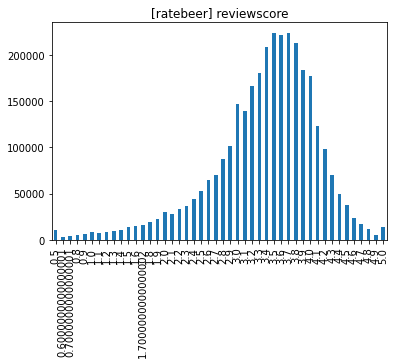

In [32]:
ratebeer["reviewscore"].value_counts().sort_index().plot(kind = "bar")
plt.title("[ratebeer] reviewscore")
plt.show()

### review/appearance
- 5점 척도

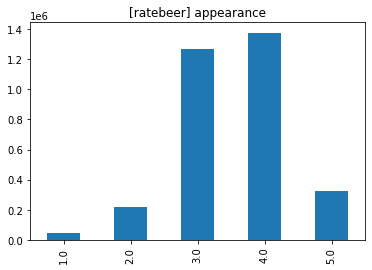

In [33]:
ratebeer["appearance"].value_counts().sort_index().plot(kind = "bar")
plt.title("[ratebeer] appearance")
plt.show()

### review/aroma
- 10점 척도

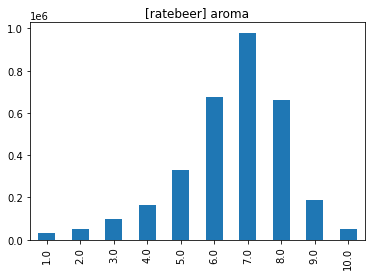

In [34]:
ratebeer["aroma"].value_counts().sort_index().plot(kind = "bar")
plt.title("[ratebeer] aroma")
plt.show()

### review/palateb
- 5점 척도

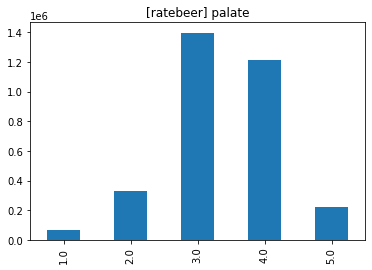

In [35]:
ratebeer["palate"].value_counts().sort_index().plot(kind = "bar")
plt.title("[ratebeer] palate")
plt.show()

### review/taste
- 10점 척도

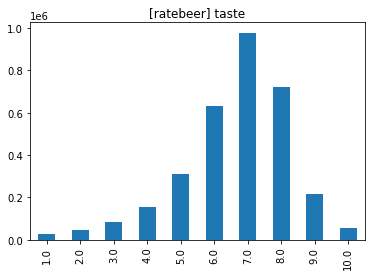

In [36]:
ratebeer["taste"].value_counts().sort_index().plot(kind = "bar")
plt.title("[ratebeer] taste")
plt.show()

### review/overall
- 20점 척도

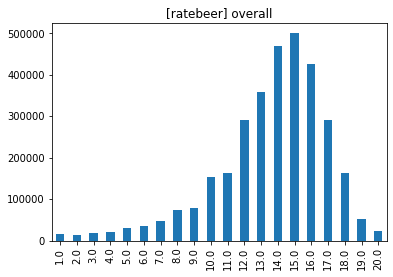

In [37]:
ratebeer["overall"].value_counts().sort_index().plot(kind = "bar")
plt.title("[ratebeer] overall")
plt.show()

In [38]:
# 척도에 따라, 어느값에 사람들이 많이 체크를 하는지 알 수 있다. 
# 5점 척도인 경우에는 3점을 많이 주는 경향이 있는 것을 볼 수 있고, 
# 10점척도인 경우게는 7점, 20점 척도에서는 10점 척도로 변경한다면 매우 비슷한 형태를 취하는 것을 알 수 있다.

# Further Works
    # 이것을 통해서 사람들은 점수를 매기는 것에 큰 의미를 두고 있지 않고, 보통 후한 값을 주는 것으로 보인다. 
    # 물론 그것을 넘기고 말고가 중요한 Key point가 될 수 있다고 생각한다.
    # 앞으로 수집하는 데이터에서는 이러한 정보를 유저로부터 수집하기 어려워지는데, 이런 문제를 해결하기 해당 데이터를 어떻게 사용할지도 고려해봐야한다.
        # ex Preference의 Confidence 인자로 활용하여, 선호 비선호 구별?
    # overall 에서 유저의 평가가 올바르게 이루어질 경우, 

### review/time

- `2022-05-15T17:26:51.803Z` 형태로 날짜가 기록되어있다.
- 구체적인 시간대는 기록되어있지 않았다. 

In [39]:
ratebeer_datetime = ratebeer['reviewtime'].apply(lambda x: x[:10] + " " + x[11:23])
ratebeer_datetime

0          2022-05-15 17:26:51.803
1          2022-05-04 19:05:02.673
2          2021-10-24 12:35:44.710
3          2021-08-31 20:31:34.537
4          2021-08-23 02:07:23.170
                    ...           
3316693    2001-12-28 01:50:14.000
3316694    2001-11-26 13:09:46.000
3316695    2001-06-27 15:13:30.000
3316696    2001-06-02 16:24:19.000
3316697    2000-07-19 13:26:50.000
Name: reviewtime, Length: 3244442, dtype: object

In [40]:
print(f"[ratebeer] 리뷰 기록 기간 {ratebeer_datetime.min()} ~ {ratebeer_datetime.max()}")

[ratebeer] 리뷰 기록 기간 2000-04-12 06:22:38.000 ~ 2022-05-29 01:50:56.947


In [41]:
# 시간 데이터 탐색 | 시간 정보에 의한 인사이트 확보
df_dt = pd.DataFrame()
df_dt["dt"] = ratebeer_datetime.apply(lambda x: datetime.fromisoformat(x))
df_dt["date"] = df_dt["dt"].apply(lambda x: str(x.date()))
df_dt["year"] = df_dt["dt"].apply(lambda x: x.year)
df_dt["month"] = df_dt["dt"].apply(lambda x: x.month)
df_dt["day"] = df_dt["dt"].apply(lambda x: x.day)
df_dt["weekday"] = df_dt["dt"].apply(lambda x: x.weekday())

# (dataframe-skill) 시간이 너무 많이 소요된다. 해결 방안은?

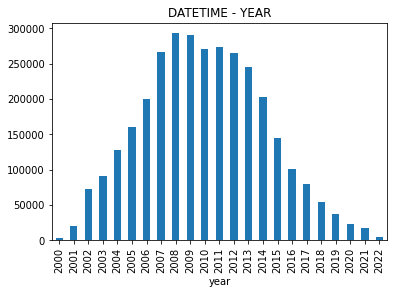

In [42]:
df_dt.value_counts("year").sort_index().plot(kind = "bar")
plt.title("DATETIME - YEAR")
plt.show()

In [43]:
# 아마도 서비스가 성장함에 따라 기록이 늘었을 가능성이 높다.
# 추후에 Benchmark dataset을 어떻게 구성할지 고려해볼 수 있는 부분이 되겠다.

# (추가) 서비스의 이용율이 점점 떨어지는 것을 볼 수 있다

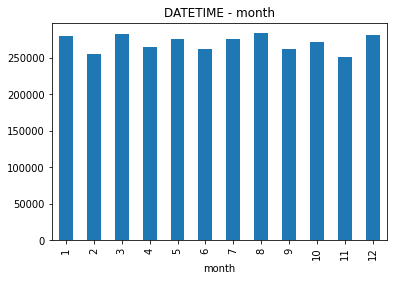

In [44]:
df_dt.value_counts("month").sort_index().plot(kind = "bar")
plt.title("DATETIME - month")
plt.show()

In [45]:
# 외국 데이터로, 사계절이 뚜렷해서 여름-맥주 를 연결시켜서 상품화 하는 우리나라와는 달리
# 사계절이 불분명하기 때문에 어떤 시즌에 맥주가 많이 소비되고 그런 경향성은 보이지 않는 것 같다.

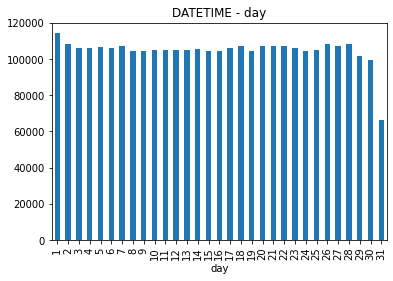

In [46]:
df_dt.value_counts("day").sort_index().plot(kind = "bar")
plt.title("DATETIME - day")
plt.show()

In [47]:
# 마찬가지로, 날짜는 어떠한 경향성도 존재하지 않는 것으로 보인다. 다만, 1일은 조금 많은 소비가 있는 것으로 보인다. 

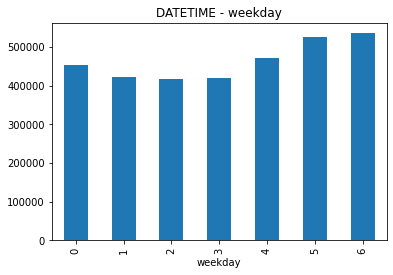

In [48]:
df_dt.value_counts("weekday").sort_index().plot(kind = "bar")
plt.title("DATETIME - weekday")
plt.show()

In [49]:
# 확실히 금요일, 토요일에 맥주 리뷰를 많이 하는 것으로 나타난다. 
# 다른 날도 충분히 많이 보고 있지만, 일요일을 제외한 주말로 갈 수록 리뷰의 수가 증가하는 추세를 볼 수 있다.

### review/profileName

In [50]:
n_user = ratebeer['profile_name'].nunique()
print(f"[ratebeer] 유저의 수: {n_user:,}")

[ratebeer] 유저의 수: 60,582


In [51]:
# sparsity
print(f"[ratebeer] Sparsity: {1-n_data/(n_item*n_user):2.3%} | Density: {n_data/(n_item*n_user):2.3%}")

[ratebeer] Sparsity: 99.426% | Density: 0.574%


<AxesSubplot:>

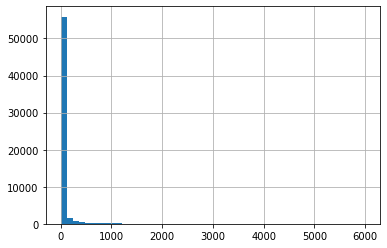

In [52]:
# 한 명의 유저가 남긴 리뷰의 수 분포는?
ratebeer.value_counts("profile_name").hist(bins = 50)

In [53]:
# 대부분이 적은 리뷰 수를 남긴다. (일반인)
# (생각해볼점) 적은 리뷰를 남긴 유저의 데이터가 추천 모델을 학습시키기에 적합할까? 
#       -> 어떻게 처리할 수 있을까? 그래도 양질의 정성이 담긴 평가가 있다면, 그것은 해당 아이템에 대한 평가에 소중한 의견이 될 수 있다.
# 하지만, 역시나, 무언가를 추천해주기에는, 해당 유저의 특성을 하나의 맥주만으로 파악할 수 없기 때문에, 어렵다.
# 하지만, 해당 데이터는 리뷰를 가지고 있으므로, 리뷰 글을 통해서 비슷한 유저인지 아닌지 좀 파악알 수 있지 않을까?

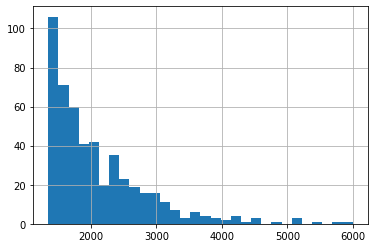

In [54]:
# 리뷰 개수 상위 500명에 대한 분포
ratebeer.value_counts("profile_name")[:500].hist(bins = 30)
plt.show()

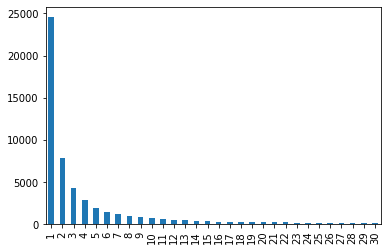

1    24575
2     7897
3     4264
4     2796
5     1936
dtype: int64

In [55]:
# 리뷰를 적게 남긴 유저의 기준으로 리뷰 개수별 몇 명이 있는지 분포를 확인해보자.
ratebeer.value_counts("profile_name").value_counts().sort_index().head(30).plot(kind = "bar")
plt.show()
ratebeer.value_counts("profile_name").value_counts().sort_index().head(5)

In [56]:
# 리뷰를 남긴 개수의 기본 통계치
ratebeer.value_counts("profile_name").describe()

count    60582.000000
mean        53.554554
std        238.113776
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max       5999.000000
dtype: float64

In [57]:
# 가장 많은 리뷰 수를 남긴 유저는 무려 5999 건의 리뷰를 남겼다. 중위수는 2개이다.

In [58]:
# (고민해야할 부분) 우리는 과연 몇 개의 리뷰를 남긴 데이터를 우리 추천에 활용할 수 있을지?
ratebeer.value_counts("profile_name").value_counts(normalize=True)

1       0.405649
2       0.130352
3       0.070384
4       0.046152
5       0.031957
          ...   
949     0.000017
981     0.000017
1013    0.000017
1993    0.000017
1983    0.000017
Length: 1529, dtype: float64

In [59]:
# 적은 리뷰 수를 기록하는 유저들을 제외하고 data의 sparsity 변화 추이를 확인해보자.
df_user = ratebeer.value_counts("profile_name").reset_index()
df_user.columns = ["profile_name", "freq"]
ratebeer = ratebeer.merge(df_user, on = "profile_name")

df_user.head()

,profile_name,freq
0,Ungstrup,5999
1,yespr,5832
2,Papsoe,5517
3,bu11zeye,5160
4,fonefan,5121


In [60]:
print("[ratebeer] 리뷰 개수가 N개 이하인 유저 제외")
print("|  N | SPARSITY | DENSITY |    SIZE   | # items | # users |")
# print("-----------------------------------------------------------")
for i in range(15):
    df_temp = ratebeer.query(f"freq > {i}")
    temp_n_item = df_temp["beer_name"].nunique()
    temp_n_user = df_temp["profile_name"].nunique()
    temp_n_data = df_temp.shape[0]
    temp_density = temp_n_data/(temp_n_item*temp_n_user)
    print(f"| {i:2} | {1-temp_density:2.4%} | {temp_density:2.4%} | ", end = "")
    print(f"{temp_n_data:7,} | {temp_n_item:7,} | {temp_n_user:7,} |")

[ratebeer] 리뷰 개수가 N개 이하인 유저 제외
|  N | SPARSITY | DENSITY |    SIZE   | # items | # users |
|  0 | 99.4264% | 0.5736% | 3,244,442 |   9,336 |  60,582 |
|  1 | 99.0421% | 0.9579% | 3,219,867 |   9,335 |  36,007 |
|  2 | 98.7790% | 1.2210% | 3,204,073 |   9,335 |  28,110 |
|  3 | 98.5664% | 1.4336% | 3,191,281 |   9,335 |  23,846 |
|  4 | 98.3816% | 1.6184% | 3,180,097 |   9,335 |  21,050 |
|  5 | 98.2232% | 1.7768% | 3,170,417 |   9,335 |  19,114 |
|  6 | 98.0821% | 1.9179% | 3,161,693 |   9,335 |  17,660 |
|  7 | 97.9543% | 2.0457% | 3,153,671 |   9,335 |  16,514 |
|  8 | 97.8311% | 2.1689% | 3,145,863 |   9,335 |  15,538 |
|  9 | 97.7136% | 2.2864% | 3,138,357 |   9,335 |  14,704 |
| 10 | 97.6047% | 2.3953% | 3,131,357 |   9,335 |  14,004 |
| 11 | 97.5121% | 2.4879% | 3,125,340 |   9,335 |  13,457 |
| 12 | 97.4154% | 2.5846% | 3,118,980 |   9,335 |  12,927 |
| 13 | 97.3217% | 2.6783% | 3,112,779 |   9,335 |  12,450 |
| 14 | 97.2414% | 2.7586% | 3,107,417 |   9,335 |  12,067 |


In [61]:
# 적은 리뷰를 기록한 유저를 추천 시스템 모델을 학습시키는데에 제외해도 될 것같다. 
# 오직 유저의 수만 줄어든다.

# (고민 해야하는 내용)
# 적은 리뷰 수를 기록한 유저를 제외하는 것은 어떤 리스크가 존재할까?
# 잠재 고객들에게 우리는 유저가 마셔본 맥주 중에 10개 이상의 맥주에 대해서 평가를 요구할 예정이다. (10개 이상의 맥주를 마셔본 적이 없다면, 그냥 인기도 기반 추천을 할 수 밖에)
# 그래서 초기 유저에게서 10개 맥주에 대한 정보를 얻을 수 있다면, Cold-start problem이 어느정도 해결된 데이터만을 가지고 학습 시키는 것도 괜찮을것같다. 

# (EDA 에서 유저가 10개를 선택하지 못하는 상황도 고려해보자!)
# 하지만, 나의 뇌피셜로는, 우리가 실제로 고민해야할것은, 현실에서는 이렇게 유저에게 이러한 문제를 얻고자 하는 것도 어려운 일일 수 있다. 따라서, 
# 이런 부분만 고려해야할 것이 아니라, 실제로 맥주에 대한 경험이 별로 없다던지, 그런 이벤트가 있을 수 있다. 
# 그런 경우에도 추천해줄 수 있는 단순 모델이나 그런 방법들이 있다.


### review/text

In [68]:
print(f"전체 데이터의 길이             = {ratebeer.shape[0]:7,}")
nunique_reviewtext = ratebeer["reviewtext"].nunique()
print(f"중복되지 않는 review/text 개수 = {nunique_reviewtext:7,}")
print(f"                    - )    = {ratebeer.shape[0] - nunique_reviewtext:7,}")

전체 데이터의 길이             = 3,244,442
중복되지 않는 review/text 개수 = 3,230,096
                    - )    =  14,346


In [69]:
# 리뷰는 모든 글이 다 달라야 정상이 아닌가? 그런데, 같은 리뷰가 있는것으로 보인다. 

In [71]:
# 약 10만개의 같은 리뷰는 어떤 리뷰들로 이루어져있을까?
ratebeer["reviewtext"].value_counts().where(lambda x: x>1).dropna()

............................................................................                                                                                                                                                                                                                                                                                                                                              2972.0
...........................................................................                                                                                                                                                                                                                                                                                                                                                972.0
Õlle on selline jook, et iga uus kord kui klaasi või pudeli suule tõstad, siis leiad midagi uut, sõltuvalt tuhandest-miljonist pisiasjast, mis hetke olukorda mõjutava

In [72]:
# 엄청나게 많은 중복이 있는 텍스트가 있는것을 확인할 수 있다.
# 71,587 개의 유니크한 리뷰 텍스트가 약 10K 개의 중복된 리뷰를 만들어내었다.

In [73]:
# (Further Works) 정상적인 이용을 위해서 다음과 같은 것을 알아볼 필요가 있다고 판단된다.
# - 모든 중복 데이터에 대해서 이게 어떤 방식으로 작성된 것인지 파악해야한다. 
#   - 모두 같은 유저에 의해서 작성된 것인가?
#   - 밈 처럼 사용되는 것인가?
#   - 리뷰가 매우 많은 맥주에 대해서 발견되는 것인가?
#   - 리뷰가 같다면, 혹시 매크로에 의해서 작성된 것인가? (수치형 리뷰가 모두 같은 점수이거나 일정한 랜덤성을 따를 수 있다.)
# 
# - 3개 이하의 중복의 데이터에 대해서 
#   - 이전에 봤던 같은 맥주 이름을 공유하고 있는 서로 다음 맥주 일련번호가 혹시 같은 리뷰를 공유하고 있는 것은 아닐까?

In [74]:
# 중복된 리뷰 텍스트와 맥주 이름 간의 관계성 파악
duplicated_reviewtext_list = ratebeer["reviewtext"].value_counts().where(lambda x: x>1).dropna().index.to_list()
df_duplicated_reviewtext = ratebeer[ratebeer["reviewtext"].isin(duplicated_reviewtext_list)]

# 같은 맥주 내에 같은 리뷰가 몇 개씩 있을까?
df_duplicated_reviewtext.groupby("beer_name")["reviewtext"].nunique()


beer_name
1516 NZ Victory Hop Devil India Pale Ale                                  1
1906 Reserva Especial                                                     3
21st Amendment / Firestone Walker / Stone El Camino (Un)Real Black Ale    2
21st Amendment Back in Black                                              3
21st Amendment Bitter American                                            1
                                                                         ..
Zischke Kellerbier Original                                               3
Zunft Kölsch                                                              2
Zwet.be                                                                   5
Zwiesel Dampfbier                                                         1
Zötler Korbinian Dunkel                                                   1
Name: reviewtext, Length: 4669, dtype: int64

In [78]:
# 해당 결과를 통해서 중복된 리뷰에 대해 꼭 중복된 리뷰가 같은 맥주에만 존재하는 것은 아니라는 것을 알 수 있다.

In [75]:
# 같은 맥주 내에 같은 리뷰는 모두 같은 사람이 작성했을까? 
(df_duplicated_reviewtext["profile_name"] + df_duplicated_reviewtext["reviewtext"]).nunique()

7371

In [76]:
(df_duplicated_reviewtext["reviewtext"]).nunique()

4484

In [81]:
# 거의 모든 사람이 같은 리뷰 텍스트를 같은 사람이 쓰고 있었다.
# 따라서 데이터의 중복의 가능성이 열려져 있으므로, 중복 데이터를 제외하고, 모든 내용에 대해서 재검토가 필요할 것으로 보인다.

In [78]:
# 같은 맥주에 한 명의 유저가 중복으로 리뷰 기록이 있는 수는?
before_n = ratebeer.shape[0]
after_n = (ratebeer["profile_name"] + ratebeer["beer_name"]).nunique()
print(f"[ratebeer] 같은 맥주에 중복으로 리뷰를 작성한 리뷰 수 = ", end = "")
print(f"{before_n:,} - {after_n:,} = {before_n - after_n:,}")

[ratebeer] 같은 맥주에 중복으로 리뷰를 작성한 리뷰 수 = 3,244,442 - 3,243,662 = 780


In [84]:
# 같은 유저가 하나의 맥주에 여러개의 리뷰를 작성한 것을 도합 70K 정도 된다. 이는 전체 데이터 셋의 크기에 비하면 적은 수치이므로, 해당 데이터는 문제가 되지 않을 수 있다.
# 해당 데이터는 CF기반 모델을 학습시킬때, 제외하는 것이 맞지만, 
# 반대로, Seqeunce기반 모델을 학습 시킬때는, 유용하게 사용될 수 있다.

In [85]:
# 모델링에 관하여, 
# 마지막으로, 맥주는 주로 먹어본 맥주를 선택할 확률이 높다. 선택했던 맥주와 새로운 맥주를 골고루 배합해서 주는 방향으로 맥주를 추천해줘야할 것이다. 
# 그런 측면에서, 중복 기록에 대해서도 인식할 수 있는 모델을 만드는 것이 좋지 않을까? (뭐 점수가 있기 때문에, 이 부분은 크게 고려하지 않아도 될 수 있다.. 데이터 처리가 중요)